In [1]:
# Data annotations described here:
# https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/software-and-datasets/mpii-human-pose-dataset/download
import scipy.io

mat_file_path = 'content/mpii/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat'
release_data = scipy.io.loadmat(mat_file_path)['RELEASE']
print(f"Fields inside 'RELEASE' structured array: {release_data.dtype.names}")
annolist = release_data['annolist'][0, 0]
print(f"Shape of 'annolist': {annolist.shape}")

first_image_annots = annolist[0, 0]  # Or maybe annolist[0] depending on shape
print("\nInspecti----", first_image_annots.dtype.names)
print(first_image_annots['image'][0][0][0][0])

act = release_data['act'][0, 0]
print(f"act ::: {act}")
filenames_map = {}

for datum in range(annolist.shape[1]):  # Iterate through the second dimension of annolist
    image_annot = annolist[0, datum]  # Access the element using index i in the second dimension
    filename = image_annot['image'][0][0][0][0]  # Extract the filename

    filenames_map[datum] = filename

    if datum < 5:
        print(f"Filename for index {datum}: {filename}")

Fields inside 'RELEASE' structured array: ('annolist', 'img_train', 'version', 'single_person', 'act', 'video_list')
Shape of 'annolist': (1, 24987)

Inspecti---- ('image', 'annorect', 'frame_sec', 'vididx')
037454012.jpg
act ::: [[(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 ...
 [(array(['transportation'], dtype='<U14'), array(['pushing car'], dtype='<U11'), array([[972]], dtype=uint16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]]
Filename for index 0: 037454012.jpg
Filename for index 1: 095071431.jpg
Filename for index 2: 073199394.jpg
Filename for index 3: 059865848.jpg
Filename for index 4: 015601864.jpg


In [2]:
import os

act = release_data['act'][0, 0]
dataset = []
number_skipped = 0
activities_set = set()

for datum, item in enumerate(act):
    try:
        cat_name = item[0][0][0] if len(item[0]) > 0 and len(item[0][0]) > 0 else None
        act_name = item[0][1][0] if len(item[0]) > 1 and len(item[0][1]) > 0 else None
        activities = str(act_name).split(", ")
        #act_id = item[0][2][0][0] if len(item[0]) > 2 and len(item[0][2]) > 0 else None
        if not act_name:
            number_skipped += 1
            continue
    except IndexError:
        print("IndexError encountered. Skipping this item.")
        continue

    filename = "content/mpii/images/" + str(filenames_map[datum])
    if os.path.exists(filename):
        dataset.append((filename, activities))
        activities_set.update(activities)
    else:
        print(f"File {filename} does not exist. Skipping this item.")
        number_skipped += 1

print(f"number skipped: {number_skipped}")

# Žiūrim ką turim. 🥸
for i, datum in enumerate(dataset):
    filename, act_name = datum
    if i > 100:
        break
    print(f"I: {i}. Filename {filename} act Name: {act_name}")

File content/mpii/images/040348287.jpg does not exist. Skipping this item.
File content/mpii/images/013401523.jpg does not exist. Skipping this item.
File content/mpii/images/002878268.jpg does not exist. Skipping this item.
number skipped: 6957
I: 0. Filename content/mpii/images/015601864.jpg act Name: ['curling']
I: 1. Filename content/mpii/images/015599452.jpg act Name: ['curling']
I: 2. Filename content/mpii/images/005808361.jpg act Name: ['curling']
I: 3. Filename content/mpii/images/086617615.jpg act Name: ['curling']
I: 4. Filename content/mpii/images/060111501.jpg act Name: ['curling']
I: 5. Filename content/mpii/images/070807258.jpg act Name: ['curling']
I: 6. Filename content/mpii/images/002058449.jpg act Name: ['curling']
I: 7. Filename content/mpii/images/021233911.jpg act Name: ['sitting quietly']
I: 8. Filename content/mpii/images/018182497.jpg act Name: ['sitting quietly']
I: 9. Filename content/mpii/images/018340451.jpg act Name: ['sitting', 'talking in person', 'on the

In [3]:
activities_set

{' carving wood',
 '(e.g.',
 '2.5 to 3.1 mph',
 '295)',
 '4-square',
 '75 lbs or more',
 'Alaska Native Games',
 'Anishinaabe Jingle Dancing',
 'BMX',
 'Beguine',
 'Bellair',
 'Bongo',
 "Brukin's",
 'Caribbean Quadrills',
 'Caribbean dance (Abakua',
 'Dinki Mini',
 'Elliptical trainer',
 'Eskimo Olympics',
 'Fitball exercise',
 'G',
 'Gere',
 'Greek',
 'Irish step dancing',
 'Middle Eastern',
 'Nadisodhana',
 'Navy Seal',
 'Power',
 'TV conditioning programs',
 'accordion',
 'active workstation',
 'adults playing (e.g.',
 'aerobic',
 'airline flight attendant',
 'all-terrain vehicle',
 'andor with talking involved (e.g.',
 'applying fertilizer or seeding a lawn',
 'archery',
 'arts and crafts',
 'assisting with birthing,',
 'automobile repair',
 'backpacking',
 'backstage employee',
 'backstroke',
 'badminton',
 'bakery',
 'ballet',
 'ballroom',
 'bamba y plena',
 'base jumping',
 'basketball',
 'batting',
 'beach',
 'benbe)',
 'biathlon',
 'bicycling',
 'billiards',
 'bird watching',


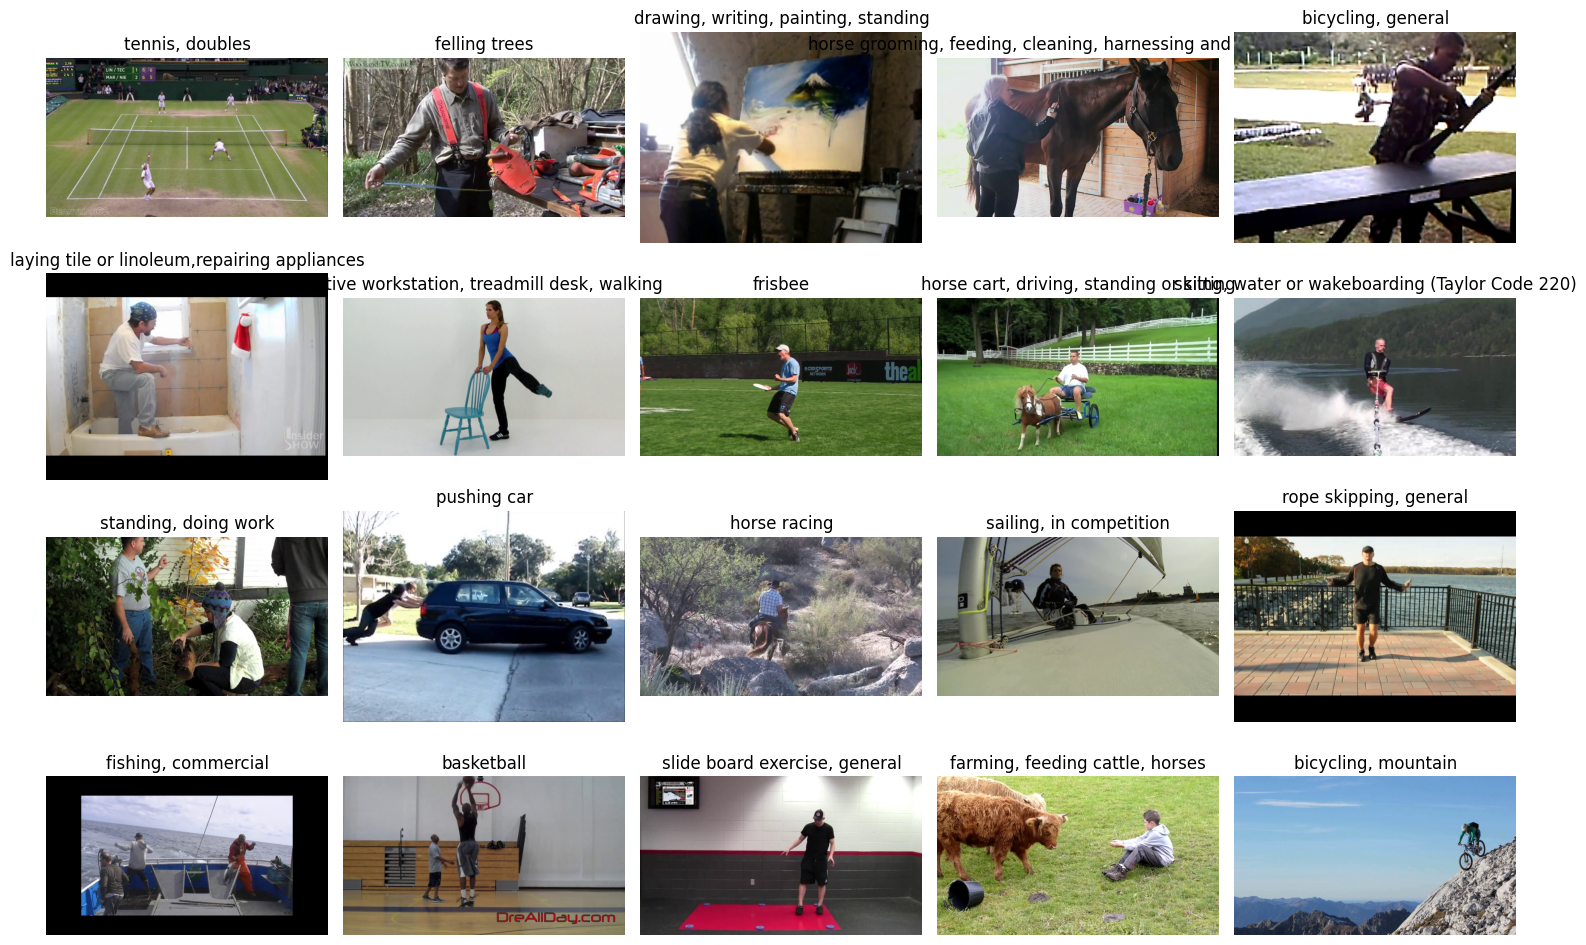

In [10]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_random_images(dataset, num_images=20):
    random_indices = random.sample(range(len(dataset)), num_images)
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(random_indices):
        filename, act_name = dataset[idx]
        img = mpimg.imread(filename)
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(", ".join(act_name))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_images(dataset, num_images=20)

In [17]:
import os

# Define the folder path
folder_path = './content/pushups'

# Initialize the dataset
pushups_dataset = []

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):  # Ensure it's a file
        pushups_dataset.append((file_path, ["push-ups"]))

# Žiūrim ką turim. 🥸
for i, datum in enumerate(pushups_dataset):
    filename, act_name = datum
    if i > 100:
        break
    print(f"I: {i}. Filename {filename} act Name: {act_name}")

I: 0. Filename ./content/pushups/images?q=tbn:ANd9GcTipRg3kgcAKY1Tkkv3-DdWU3ieLf1D2Ufbgg&s act Name: ['push-ups']
I: 1. Filename ./content/pushups/images?q=tbn:ANd9GcSrq5Rpn32O1LrxtdJ0XHVEeAycjYnD5I1U1Q&s act Name: ['push-ups']
I: 2. Filename ./content/pushups/images?q=tbn:ANd9GcQ1zk-gZtJr_7EKR-lj7Sxbrss-IsFUwFR45A&s act Name: ['push-ups']
I: 3. Filename ./content/pushups/images?q=tbn:ANd9GcStvUucv9ug4dkD0212d969hHxxtN6dmv1ABw&s act Name: ['push-ups']
I: 4. Filename ./content/pushups/images?q=tbn:ANd9GcSFcv_uArv-n5jKvs9B3GEmTSU0EuudGQKaPg&s act Name: ['push-ups']
I: 5. Filename ./content/pushups/images?q=tbn:ANd9GcQSEDvfeLHdYfuizjS297D7Gn588-uhO4kdAA&s act Name: ['push-ups']
I: 6. Filename ./content/pushups/images?q=tbn:ANd9GcTLfIXJxE7iGQ_SJty50yNoHqQfdv1vETz-qA&s act Name: ['push-ups']
I: 7. Filename ./content/pushups/images?q=tbn:ANd9GcRaofQsvW9_l2BcEp89U0Etet77Pa_8ja5RlQ&s act Name: ['push-ups']
I: 8. Filename ./content/pushups/images?q=tbn:ANd9GcQIwJG2jONS2_la_yxpu14_OFo7HtulXYPRQw

In [18]:
class_mapping = {
    "up": ['Irish step dancing', 'implied walking', 'implied walkingstanding - picking up yard', 'line dancing', 'race walking', 'running', 'slow walk', "standing", "walking", "standing quietly", "standing or walking", "standing in a line", 'implied walkingstanding', 'standing', 'standing in a line', 'standing or walking', 'standing quietly', 'walk', 'walking', 'walking and carrying heavy lo', 'walking slowly', 'walking the dog', 'walking to deliver mail'],
    "down": ["lying quietly", "push-ups", 'sleeping', "lying"],
    #"sit": ['sitting', 'sitting at a sporting event', 'sitting in church', 'sitting meetings', 'sitting or reclining', 'sitting or standing', 'sitting quietly', 'sitting tasks', ],
    #"other": [ 'calisthenics','gymnastics','pilates', "reclining"]
}

# Filter the dataset and rename the category to its key value
filtered_dataset = []

import copy
merged = dataset + pushups_dataset

for filename, activities in merged:
    for key, activity_list in class_mapping.items():
        if any(activity in activity_list for activity in activities):
            filtered_dataset.append((filename, [key]))
            break

# Print the filtered dataset size and a few examples
print(f"Filtered dataset size: {len(filtered_dataset)}")
for i, (filename, label) in enumerate(filtered_dataset[:10]):
    print(f"Filename: {filename}, Label: {label}")

Filtered dataset size: 3462
Filename: content/mpii/images/021233911.jpg, Label: ['sit']
Filename: content/mpii/images/018182497.jpg, Label: ['sit']
Filename: content/mpii/images/018340451.jpg, Label: ['sit']
Filename: content/mpii/images/030424224.jpg, Label: ['sit']
Filename: content/mpii/images/052475643.jpg, Label: ['sit']
Filename: content/mpii/images/043194502.jpg, Label: ['sit']
Filename: content/mpii/images/029122914.jpg, Label: ['up']
Filename: content/mpii/images/061185289.jpg, Label: ['up']
Filename: content/mpii/images/013949386.jpg, Label: ['up']
Filename: content/mpii/images/029214465.jpg, Label: ['up']


In [19]:
# Count the number of items in each category
category_counts = {}

for _, categories in filtered_dataset:
    for category in categories:
        category_counts[category] = category_counts.get(category, 0) + 1

# Print the counts for each category
for category, count in category_counts.items():
    print(f"Category: {category}, Count: {count}")


Category: sit, Count: 977
Category: up, Count: 2095
Category: down, Count: 390


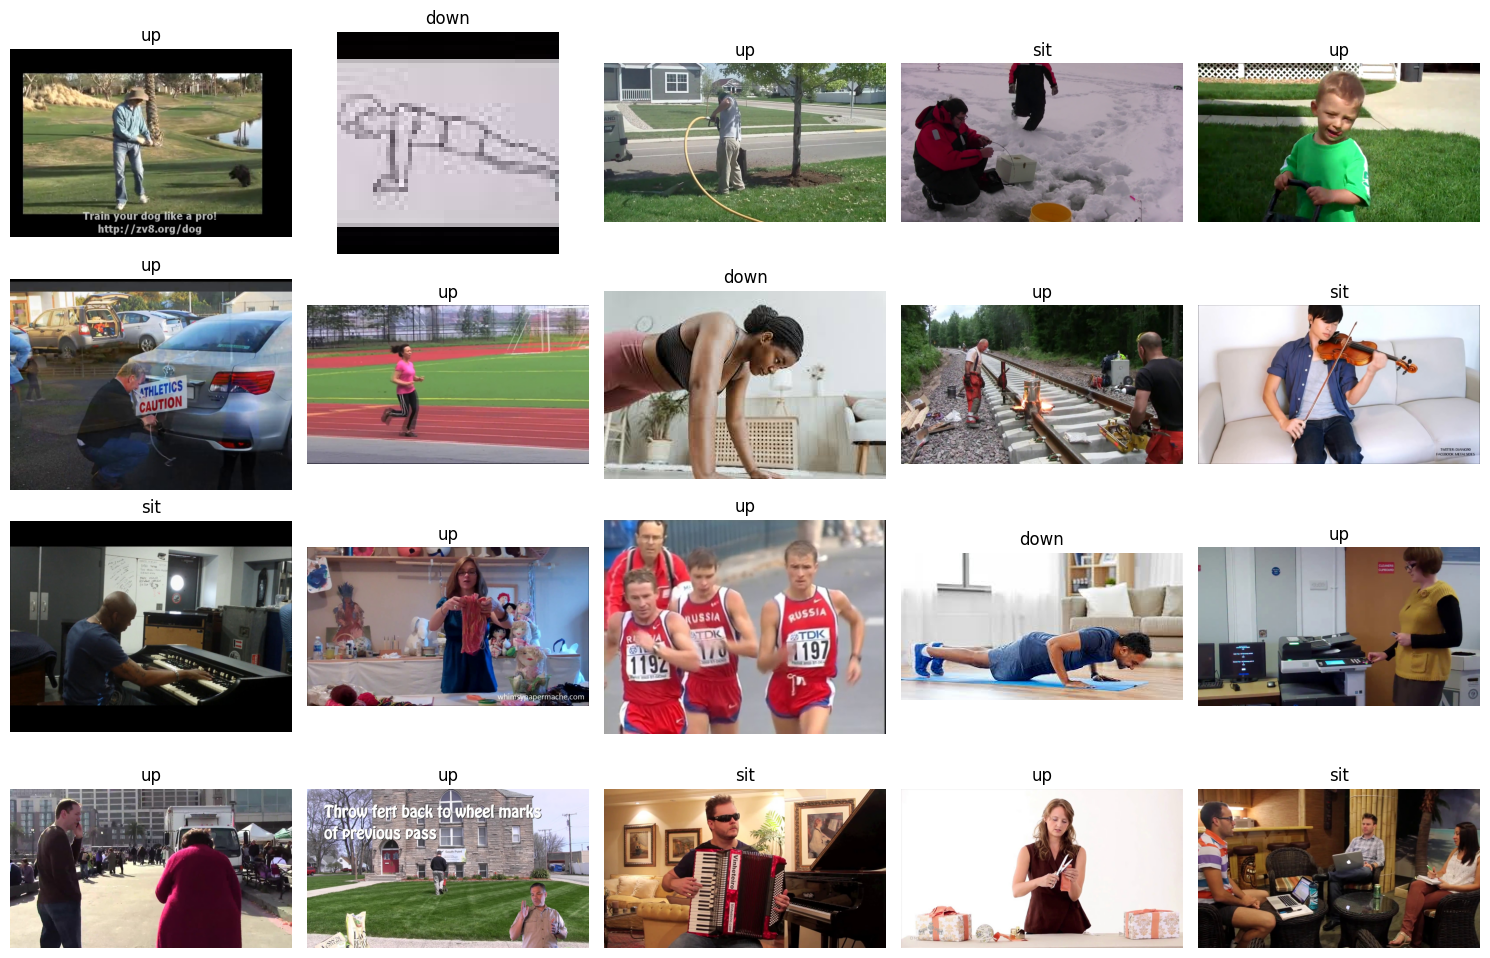

In [22]:
show_random_images(filtered_dataset, num_images=20)

In [23]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

from sklearn.preprocessing import LabelEncoder

# Create a label encoder for activities
label_encoder = LabelEncoder()
all_activities = list(activities_set)
label_encoder.fit(all_activities)


# Update the MPIIDataset class
class MPIIDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, act_name = self.data[idx]
        image = Image.open(image_path).convert('RGB')  # Ensure RGB format

        if self.transform:
            image = self.transform(image)

        # Convert activity name(s) to numerical label(s)
        label = label_encoder.transform(act_name)  # Convert to numerical indices
        label = label[0] if len(label) > 0 else 0  # Handle single-label case

        return image, label


# Split the dataset into train, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_size = int(len(dataset) * train_ratio)
val_size = int(len(dataset) * val_ratio)
test_size = len(dataset) - train_size - val_size

train_dataset = []
val_dataset = []
test_dataset = []

train_size = int(len(dataset) * train_ratio)
val_size = int(len(dataset) * val_ratio)

for i in range(len(dataset)):
    if i < train_size:
        train_dataset.append(dataset[i])
    elif i < train_size + val_size:
        val_dataset.append(dataset[i])
    else:
        test_dataset.append(dataset[i])

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

transform = transforms.Compose([
    transforms.Resize(256),  # Resize the images
    transforms.CenterCrop(224),  # Crop the images
    transforms.ToTensor(),  # Convert to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the images
])

train_dataset = MPIIDataset(train_dataset, transform=transform)
val_dataset = MPIIDataset(val_dataset, transform=transform)
test_dataset = MPIIDataset(test_dataset, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Train dataset size: 14424
Validation dataset size: 1803
Test dataset size: 1803
